In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

CROPPED IMAGE:


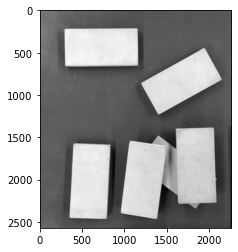

In [2]:
original_image = cv.imread("bloques1.jpg")
cropped_image = original_image[730:3300,240:2500]
grayscale_image = cv.cvtColor(cropped_image, cv.COLOR_BGR2GRAY)
blurred_image = cv.GaussianBlur(grayscale_image, (19,19),0)
print("CROPPED IMAGE:")

plt.figure("CROPPED")

plt.imshow(blurred_image, cmap='gray')
plt.show()

BINARIZED:


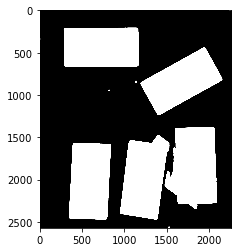

ERODE:


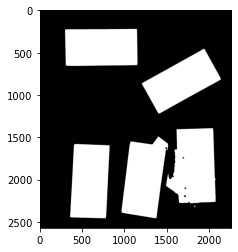

DILATE:


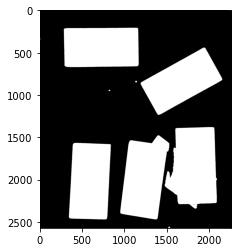

OPEN:


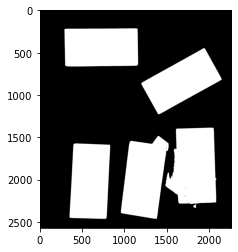

CLOSE:


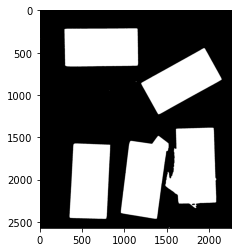

OPEN + CLOSE:


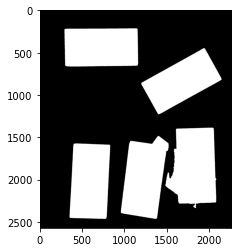

In [3]:
otsu_binarized_image = cv.threshold(blurred_image, 120, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]
print("BINARIZED:")
plt.imshow(otsu_binarized_image, cmap='gray', vmin=0, vmax=1)
plt.show()

structuring_element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (15,15))

eroded_image = cv.erode(otsu_binarized_image, structuring_element, iterations = 1)
print("ERODE:")
plt.imshow(eroded_image, cmap='gray')
plt.show()

dilated_image = cv.dilate(otsu_binarized_image, structuring_element, iterations = 1)
print("DILATE:")
plt.imshow(dilated_image, cmap='gray')
plt.show()

opened_image = cv.morphologyEx(otsu_binarized_image, cv.MORPH_OPEN, structuring_element)
print("OPEN:")
plt.imshow(opened_image, cmap='gray')
plt.show()


closed_image = cv.morphologyEx(otsu_binarized_image, cv.MORPH_CLOSE, structuring_element)
print("CLOSE:")
plt.imshow(closed_image, cmap='gray')
plt.show()

open_closed_image = cv.morphologyEx(otsu_binarized_image, cv.MORPH_OPEN, structuring_element)
open_closed_image = cv.morphologyEx(open_closed_image, cv.MORPH_CLOSE, structuring_element)
print("OPEN + CLOSE:")
plt.imshow(open_closed_image, cmap='gray')
plt.show()


CONTOURS:


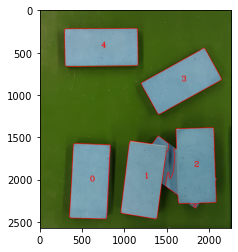

In [4]:
def draw_contours(image, contours):
    cv.drawContours(image, contours, -1, (255,0,0), 5)
    for index in range(len(contours)):
        moment = cv.moments(contours[index])
        cv.putText(image, str(index),
                   (int(moment['m10']/moment['m00']), int(moment['m01']/moment['m00'])),
                   cv.FONT_HERSHEY_COMPLEX, 3, (255,0,0), 5)
    print("CONTOURS:")
    plt.imshow(image)
    plt.show()

contours = cv.findContours(open_closed_image, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)[0]

draw_contours(cropped_image.copy(), contours)


In [5]:
def calculate_aspect_ratio(contour):
    min_area_rect = cv.minAreaRect(contour)
    width,height = min_area_rect[1]
    if (width > height):
        return float(height)/width
    else:
        return float(width)/height
    # min_area_rect = cv.minAreaRect(contour)
    # box = cv.boxPoints(min_area_rect)
    # box = np.int0(box)
    # x,y,w,h = cv.boundingRect(contour)


for index in range(len(contours)):
    contour = contours[index]
    print("CONTOUR INDEX {}".format(index))
    print("AREA: {}".format(cv.contourArea(contour)))
    print("PERIMETER: {}".format(cv.arcLength(contour, True)))
    print("ANGLE: {}".format(cv.fitEllipse(contour)[2]))
    print("ASPECT RATIO: {}".format(calculate_aspect_ratio(contour)))
    print("\n")


CONTOUR INDEX 0
AREA: 381249.0
PERIMETER: 2648.132030725479
ANGLE: 3.3308162689208984
ASPECT RATIO: 0.4957250052649757


CONTOUR INDEX 1
AREA: 391873.0
PERIMETER: 2845.734185695648
ANGLE: 8.699400901794434
ASPECT RATIO: 0.47888232152851073


CONTOUR INDEX 2
AREA: 431431.0
PERIMETER: 3135.5087900161743
ANGLE: 1.5179578065872192
ASPECT RATIO: 0.6386399982644448


CONTOUR INDEX 3
AREA: 365159.5
PERIMETER: 2731.58315718174
ANGLE: 60.93071746826172
ASPECT RATIO: 0.5001472059123977


CONTOUR INDEX 4
AREA: 380134.0
PERIMETER: 2607.9066350460052
ANGLE: 89.68225860595703
ASPECT RATIO: 0.5182935058038483


